In [24]:
################################Step 1 - Import data############################################
import pandas as pd
MyData = pd.read_csv("Income_Expense_Data.csv")

In [25]:
#Checking Size of data
MyData.shape

(14, 3)

In [26]:
#Checking first few records
MyData.head(10)

,Age,Income,Expense
0,25,40000.0,20000
1,26,35000.0,18000
2,27,90000.0,60000
3,32,70000.0,28000
4,31,75000.0,32000
5,30,71000.0,30000
6,47,NaN,25000
7,125,76000.0,30000
8,49,56000.0,16000
9,55,67000.0,20000


In [27]:
################Step 2-Data Cleaning#######################
#Check for missing values
MyData.isnull().sum() 

Age        0
Income     1
Expense    0
dtype: int64

In [28]:
#Treating null value-replacing null value with median
MyData["Income"].fillna((MyData["Income"].median()), inplace = True)

In [29]:
#Check for missing values - Again
MyData.isnull().sum()

Age        0
Income     0
Expense    0
dtype: int64

In [30]:
#Checking for outliers
MyData.describe()  #notice the maximum value in Age

,Age,Income,Expense
count,14.000000,14.000000,14.000000
mean,48.500000,65357.142857,25285.714286
std,25.928155,17032.128657,11795.883059
min,25.000000,35000.000000,11000.000000
25%,30.250000,56000.000000,18500.000000
50%,48.000000,70000.000000,24500.000000
75%,55.750000,75750.000000,29500.000000
max,125.000000,90000.000000,60000.000000


In [31]:
#Checking different percentiles
pd.DataFrame(MyData['Age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Age
count,14.000000
mean,48.500000
std,25.928155
min,25.000000
1%,25.130000
10%,26.300000
30%,30.900000
50%,48.000000
75%,55.750000
90%,61.400000


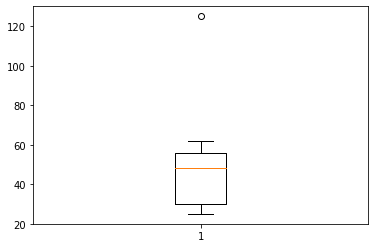

In [32]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.boxplot(MyData['Age'])
plt.show()

In [33]:
#Checking Outlier by definition and treating outliers

#getting median Age
Age_col_df = pd.DataFrame(MyData['Age'])
Age_median = Age_col_df.median()

#getting IQR of Age column
Q3 = Age_col_df.quantile(q=0.75)
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['Age']>IQR_UL , 'Age'] = int(Age_col_df.quantile(q=0.99))
MyData.loc[MyData['Age']<IQR_LL , 'Age'] = int(Age_col_df.quantile(q=0.01))

In [34]:
#Check max age value now
max(MyData['Age'])

116

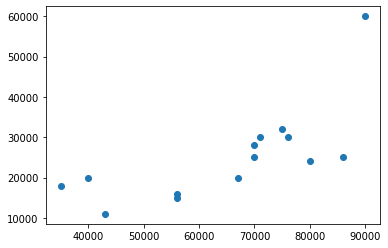

In [35]:
################Step 3-Exploratory data analysis#######################
#Check how Expense is varying with income
x = MyData["Income"]
y=  MyData["Expense"]


plt.scatter(x, y, label="Income Expense")

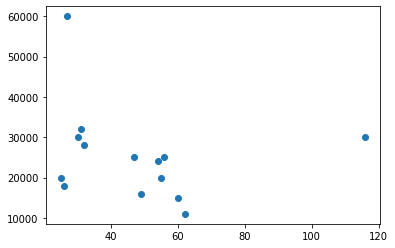

In [36]:
#Check how Expense is varying with Age
x = MyData["Age"]
y=  MyData["Expense"]


plt.scatter(x, y, label="Income Age")

<AxesSubplot:>

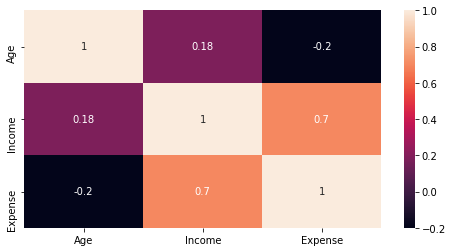

In [37]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= MyData.corr().round(2)
f, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
sns.heatmap(data=correlation_matrix, annot=True)

In [38]:
################Step 4-feature engineering#######################
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data

array([[0.        , 0.09090909, 0.18367347],
       [0.01098901, 0.        , 0.14285714],
       [0.02197802, 1.        , 1.        ],
       [0.07692308, 0.63636364, 0.34693878],
       [0.06593407, 0.72727273, 0.42857143],
       [0.05494505, 0.65454545, 0.3877551 ],
       [0.24175824, 0.63636364, 0.28571429],
       [1.        , 0.74545455, 0.3877551 ],
       [0.26373626, 0.38181818, 0.10204082],
       [0.32967033, 0.58181818, 0.18367347],
       [0.31868132, 0.81818182, 0.26530612],
       [0.34065934, 0.92727273, 0.28571429],
       [0.38461538, 0.38181818, 0.08163265],
       [0.40659341, 0.14545455, 0.        ]])

In [39]:
#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = ["Age","Income","Expense"]

In [40]:
#Separating features and response
features = ["Income","Age"]
response = ["Expense"]
X=MyData_scaled[features]
y=MyData_scaled[response]

In [41]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
#Fitting lineaar regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Checking accuracy on test data
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

model.predict(X_test) #predcited values on test data

67.82333705931674 %


array([[0.20244557],
       [0.35979061],
       [0.4694941 ]])

In [43]:
#Dumping the model object
import pickle
pickle.dump(model, open('expense_prediction.pkl','wb'))

In [44]:
#Reloading the model object
model = pickle.load(open('expense_prediction.pkl','rb'))
print(model.predict([[30000, 24]]))

[[17711.51531007]]


C:\Users\priya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
